Import necessary libraries and read in the dataset:

In [26]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(GGally)

In [2]:
# Read in the dataset
loan <- read.csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [7]:
loan

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
LP001002,Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y


**EDA Precess**

In [9]:
head(loan)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
1,LP001002,Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
6,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


In [11]:
# display the number of columns and rows
ncol(loan)
nrow(loan)

[1] 13

[1] 614

In [12]:
summary(loan)

   Loan_ID             Gender            Married           Dependents       
 Length:614         Length:614         Length:614         Length:614        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  Education         Self_Employed      ApplicantIncome CoapplicantIncome
 Length:614         Length:614         Min.   :  150   Min.   :    0    
 Class :character   Class :character   1st Qu.: 2878   1st Qu.:    0    
 Mode  :character   Mode  :character   Median : 3812   Median : 1188    
                                       Mean   : 5403   Mean   : 1621    
                   

In [13]:
# Check structure of dataset
str(loan)

'data.frame':	614 obs. of  13 variables:
 $ Loan_ID          : chr  "LP001002" "LP001003" "LP001005" "LP001006" ...
 $ Gender           : chr  "Male" "Male" "Male" "Male" ...
 $ Married          : chr  "No" "Yes" "Yes" "Yes" ...
 $ Dependents       : chr  "0" "1" "0" "0" ...
 $ Education        : chr  "Graduate" "Graduate" "Graduate" "Not Graduate" ...
 $ Self_Employed    : chr  "No" "No" "Yes" "No" ...
 $ ApplicantIncome  : int  5849 4583 3000 2583 6000 5417 2333 3036 4006 12841 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : int  NA 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area    : chr  "Urban" "Rural" "Urban" "Urban" ...
 $ Loan_Status      : chr  "Y" "N" "Y" "Y" ...


This will show the structure of the dataset, including the number of observations and variables, as well as the data type of each variable.



In [14]:
dim(loan)

[1] 614  13

In [15]:
# Check for missing values
colSums(is.na(loan))

Loan_ID            Gender           Married        Dependents 
                0                 0                 0                 0 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                 0                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
               22                14                50                 0 
      Loan_Status 
                0

**Visualization**

1.Visualize the distribution of the target variable using a bar chart:

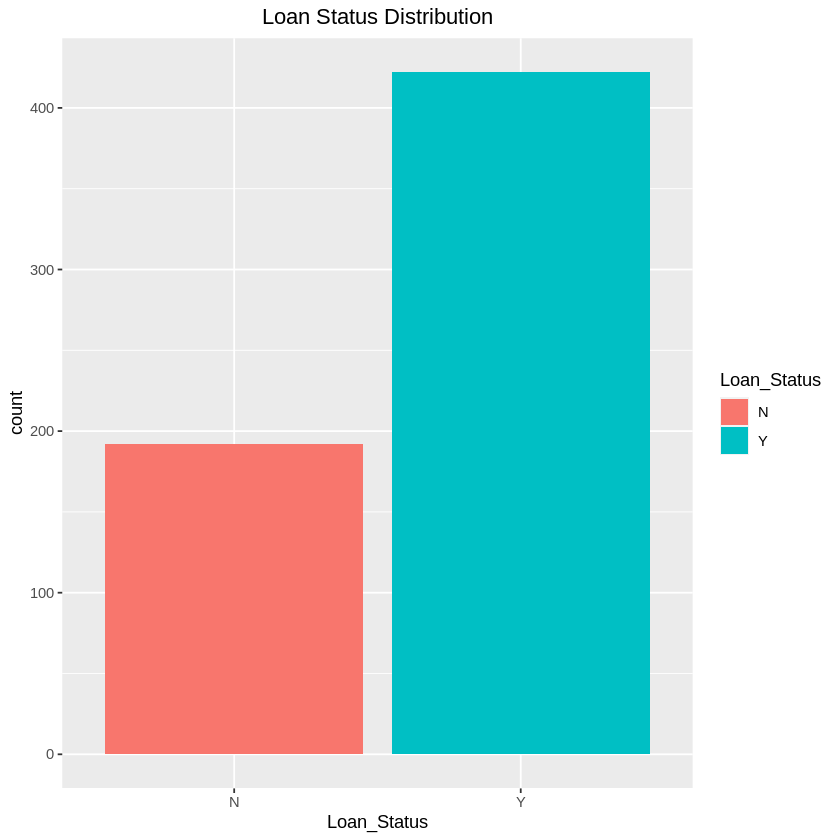

In [16]:
# Visualize distribution of target variable
loan %>% ggplot(aes(x=Loan_Status, fill=Loan_Status)) +
  geom_bar() +
  ggtitle("Loan Status Distribution") +
  theme(plot.title = element_text(hjust = 0.5))

This will show the distribution of the target variable, Loan_Status, which indicates whether a loan was approved or not.

2.Histogram

Warning message:
“Removed 22 rows containing non-finite values (`stat_bin()`).”


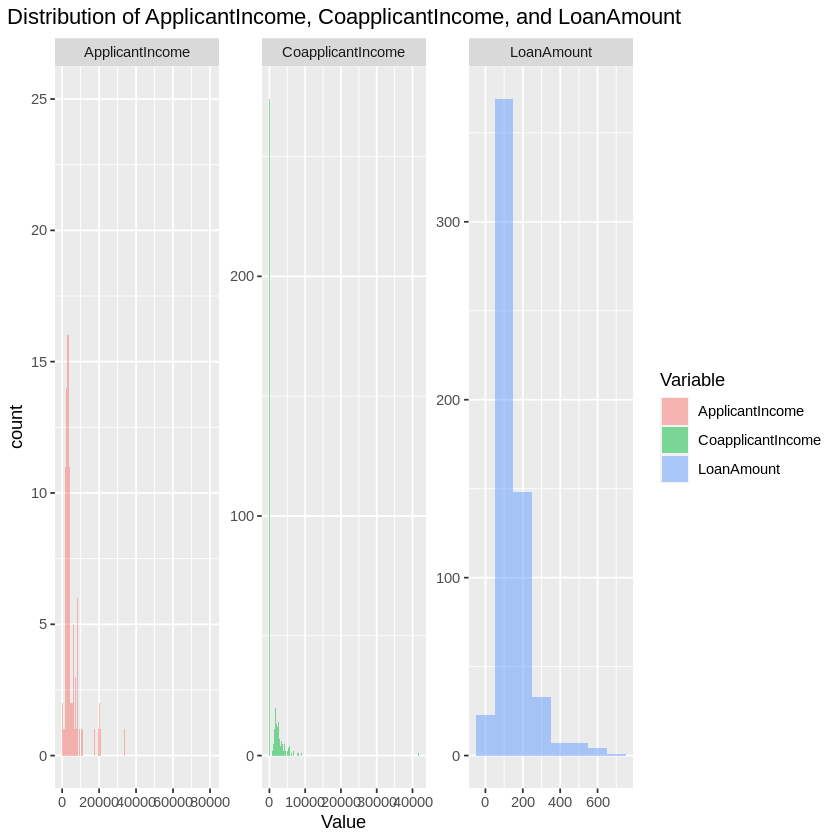

In [17]:
# Visualize distribution of numerical variables
loan %>% select(ApplicantIncome, CoapplicantIncome, LoanAmount) %>% 
  pivot_longer(everything(), names_to="Variable", values_to="Value") %>%
  ggplot(aes(x=Value, fill=Variable)) +
  geom_histogram(binwidth = 100, alpha=0.5, position="dodge") +
  ggtitle("Distribution of ApplicantIncome, CoapplicantIncome, and LoanAmount") +
  facet_wrap(~Variable, scales="free") +
  theme(plot.title = element_text(hjust = 0.5))


This will show the distribution of the numerical variables, ApplicantIncome, CoapplicantIncome, and LoanAmount, using histograms.

3.Scatterplot

Visualize the relationship between the numerical variables using a scatterplot matrix:

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 22 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 22 rows containing missing values”
Warning message:
“Removed 22 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 22 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 22 rows containing non-finite values (`stat_density()`).”


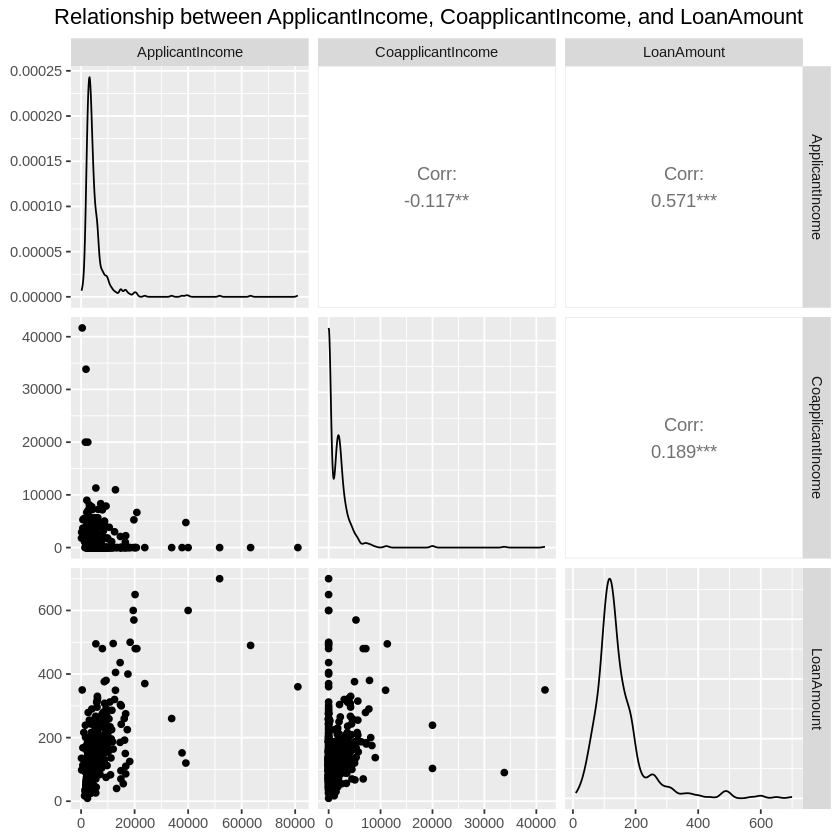

In [28]:
# Visualize relationship between numerical variables
loan %>% select(ApplicantIncome, CoapplicantIncome, LoanAmount) %>%
  ggpairs() +
  ggtitle("Relationship between ApplicantIncome, CoapplicantIncome, and LoanAmount") +
  theme(plot.title = element_text(hjust = 1))

This will show the relationship between the numerical variables, ApplicantIncome, CoapplicantIncome, and LoanAmount, using a scatterplot matrix.

4.stacked bar charts:

Visualize the relationship between the categorical variables and the target variable using stacked bar charts:

`summarise()` has grouped output by 'Variable', 'Value'. You can override using
the `.groups` argument.


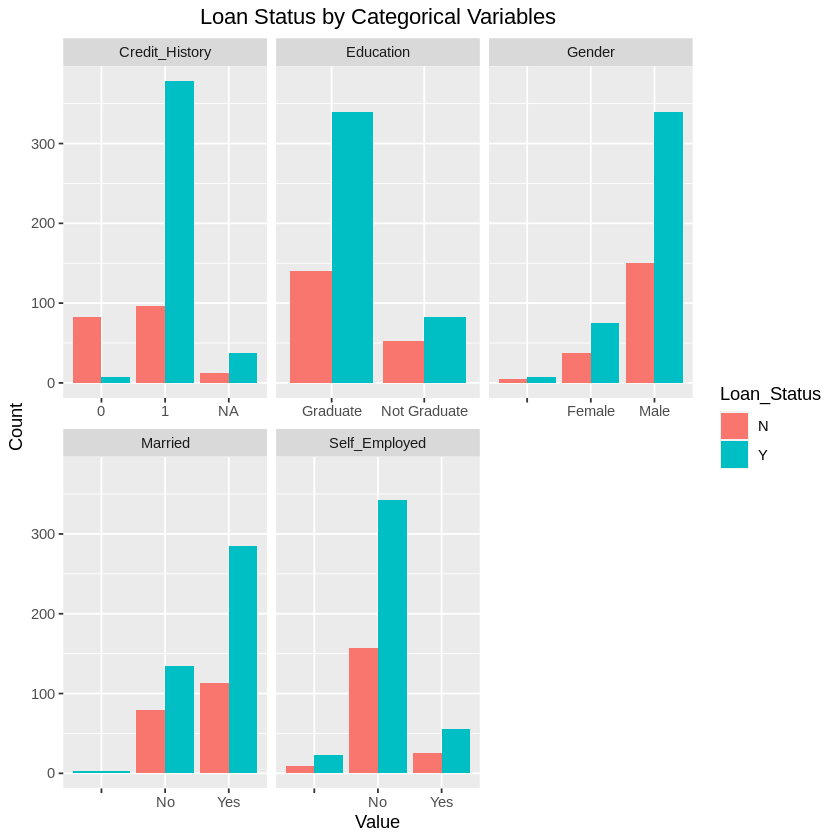

In [32]:
loan %>%
  select(Gender, Married, Education, Self_Employed, Credit_History, Loan_Status) %>%
  mutate(Credit_History = as.character(Credit_History)) %>%
  pivot_longer(cols = c(Gender, Married, Education, Self_Employed, Credit_History),
               names_to = "Variable", values_to = "Value") %>%
  group_by(Variable, Value, Loan_Status) %>%
  summarise(Count = n()) %>%
  ggplot(aes(x = Value, y = Count, fill = Loan_Status)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~Variable, scales = "free_x") +
  ggtitle("Loan Status by Categorical Variables") +
  xlab("Value") +
  ylab("Count") +
  theme(plot.title = element_text(hjust = 0.5))



Warning message:
“Removed 22 rows containing non-finite values (`stat_bin()`).”


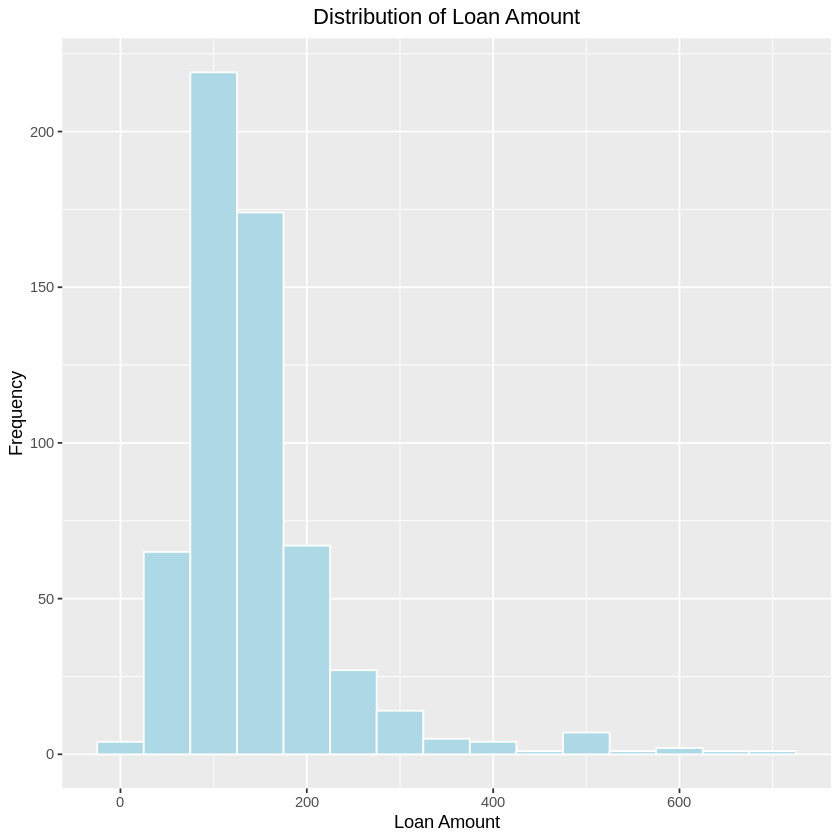

In [33]:
# 5. Visualize distribution of Loan Amount
ggplot(loan, aes(x = LoanAmount)) +
  geom_histogram(binwidth = 50, color = "white", fill = "lightblue") +
  ggtitle("Distribution of Loan Amount") +
  xlab("Loan Amount") +
  ylab("Frequency") +
  theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 22 rows containing non-finite values (`stat_boxplot()`).”


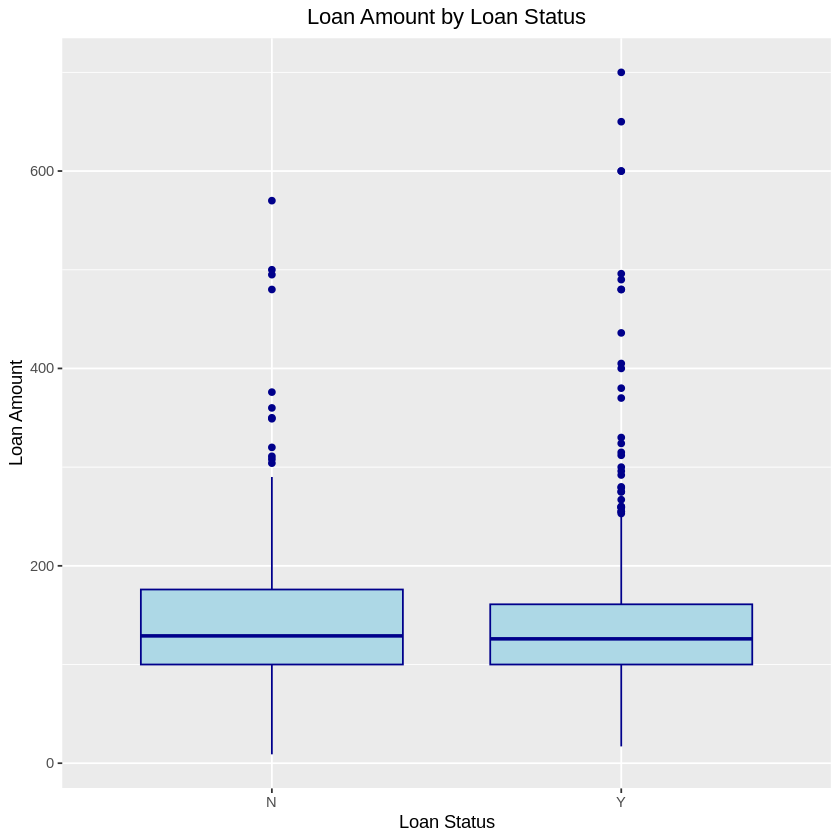

In [34]:
# 6. Visualize relationship between Loan Amount and Loan Status
ggplot(loan, aes(x = Loan_Status, y = LoanAmount)) +
  geom_boxplot(color = "darkblue", fill = "lightblue") +
  ggtitle("Loan Amount by Loan Status") +
  xlab("Loan Status") +
  ylab("Loan Amount") +
  theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 22 rows containing missing values (`geom_point()`).”


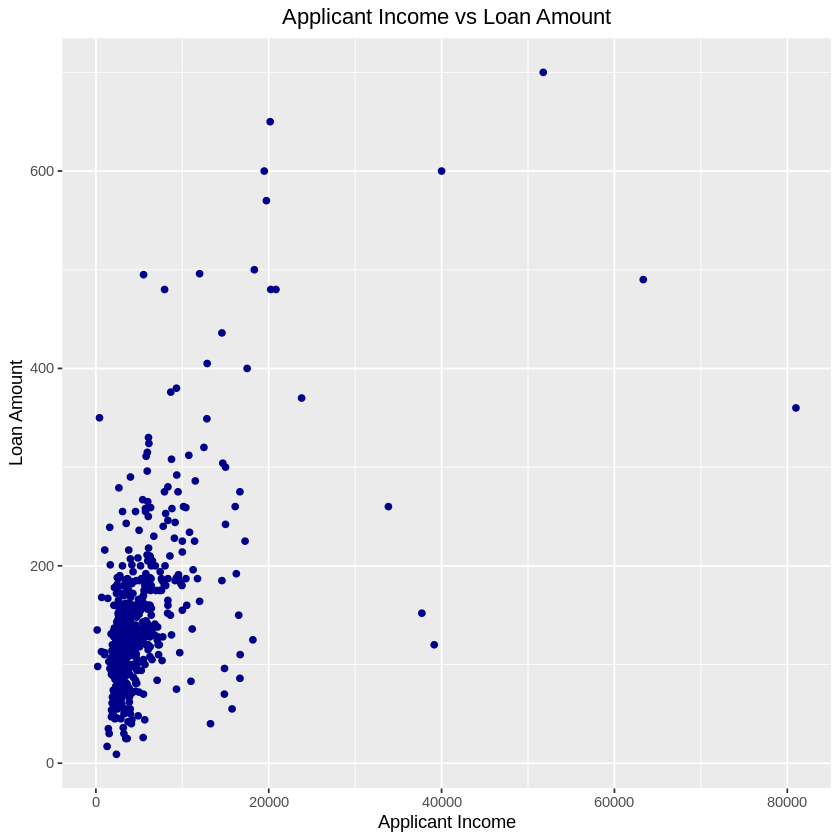

In [35]:
# 7. Visualize relationship between Applicant Income and Loan Amount
ggplot(loan, aes(x = ApplicantIncome, y = LoanAmount)) +
  geom_point(color = "darkblue") +
  ggtitle("Applicant Income vs Loan Amount") +
  xlab("Applicant Income") +
  ylab("Loan Amount") +
  theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 22 rows containing missing values (`geom_point()`).”


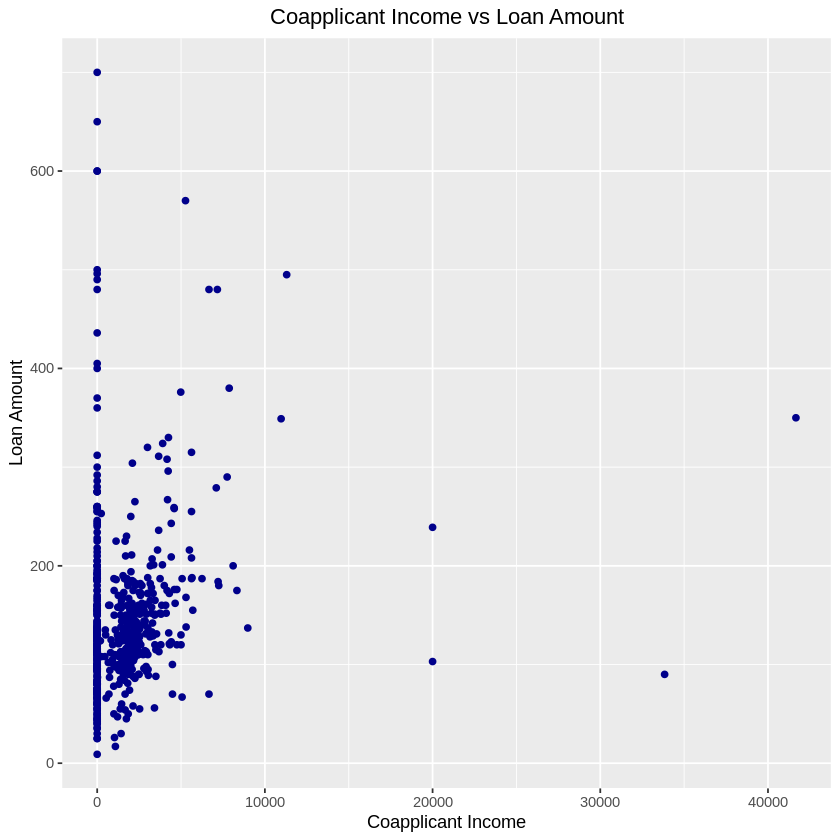

In [36]:
# 8. Visualize relationship between Coapplicant Income and Loan Amount
ggplot(loan, aes(x = CoapplicantIncome, y = LoanAmount)) +
  geom_point(color = "darkblue") +
  ggtitle("Coapplicant Income vs Loan Amount") +
  xlab("Coapplicant Income") +
  ylab("Loan Amount") +
  theme(plot.title = element_text(hjust = 0.5))

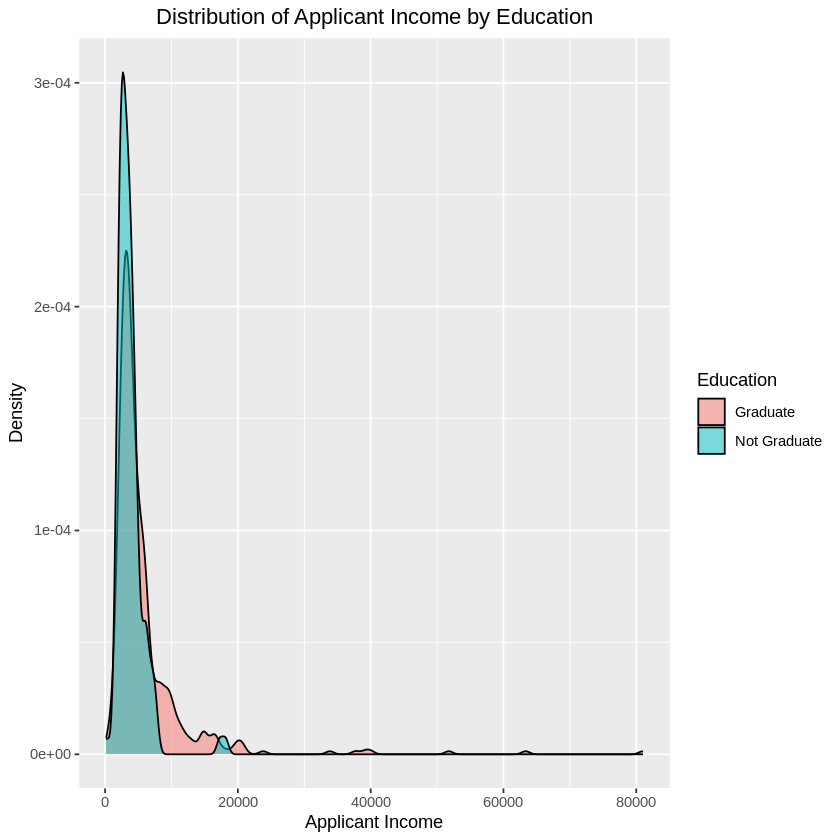

In [37]:
# 9. Visualize distribution of Applicant Income by Education level
ggplot(loan, aes(x = ApplicantIncome, fill = Education)) +
  geom_density(alpha = 0.5) +
  ggtitle("Distribution of Applicant Income by Education") +
  xlab("Applicant Income") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 22 rows containing non-finite values (`stat_boxplot()`).”


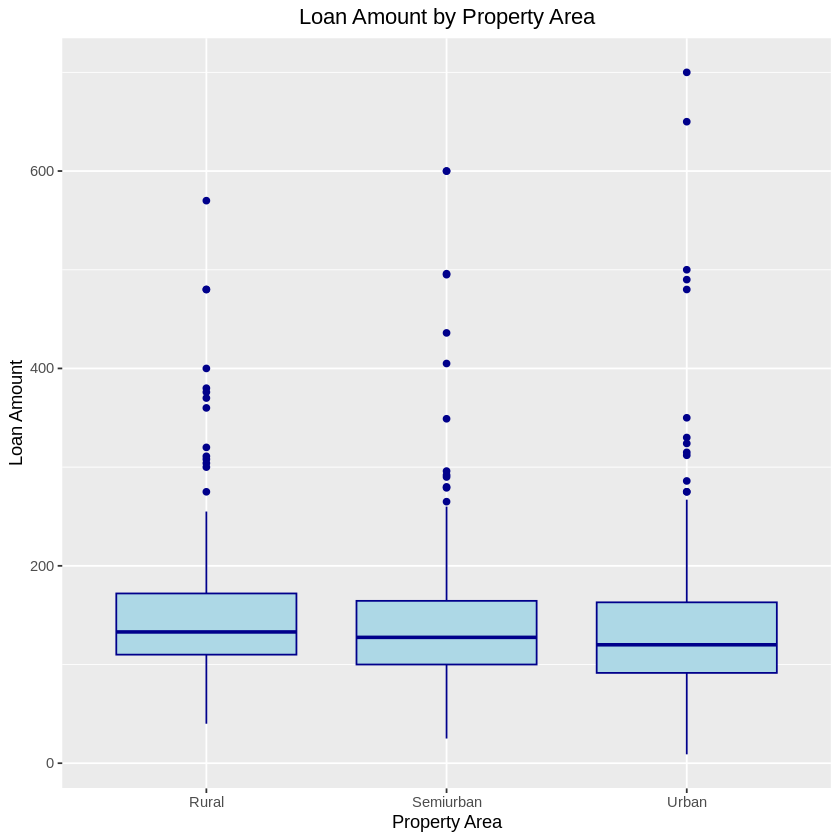

In [38]:

# 10. Visualize relationship between Loan Amount and Property Area
ggplot(loan, aes(x = Property_Area, y = LoanAmount)) +
  geom_boxplot(color = "darkblue", fill = "lightblue") +
  ggtitle("Loan Amount by Property Area") +
  xlab("Property Area") +
  ylab("Loan Amount") +
  theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 22 rows containing non-finite values (`stat_density()`).”


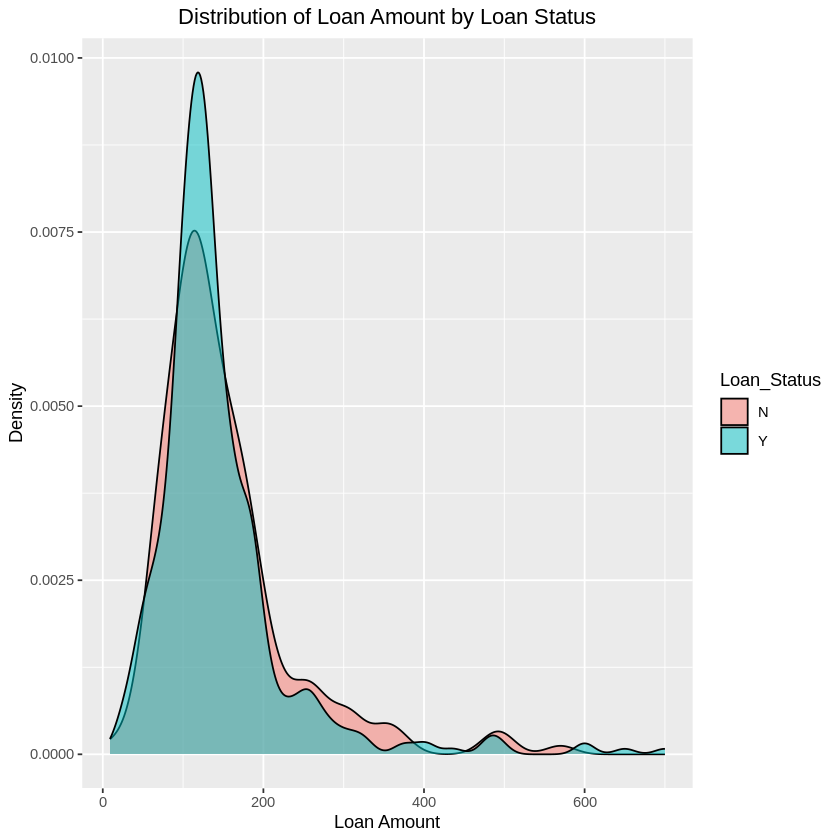

In [39]:
# 11. Visualize distribution of Loan Amount by Loan Status
ggplot(loan, aes(x = LoanAmount, fill = Loan_Status)) +
  geom_density(alpha = 0.5) +
  ggtitle("Distribution of Loan Amount by Loan Status") +
  xlab("Loan Amount") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 22 rows containing non-finite values (`stat_density()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


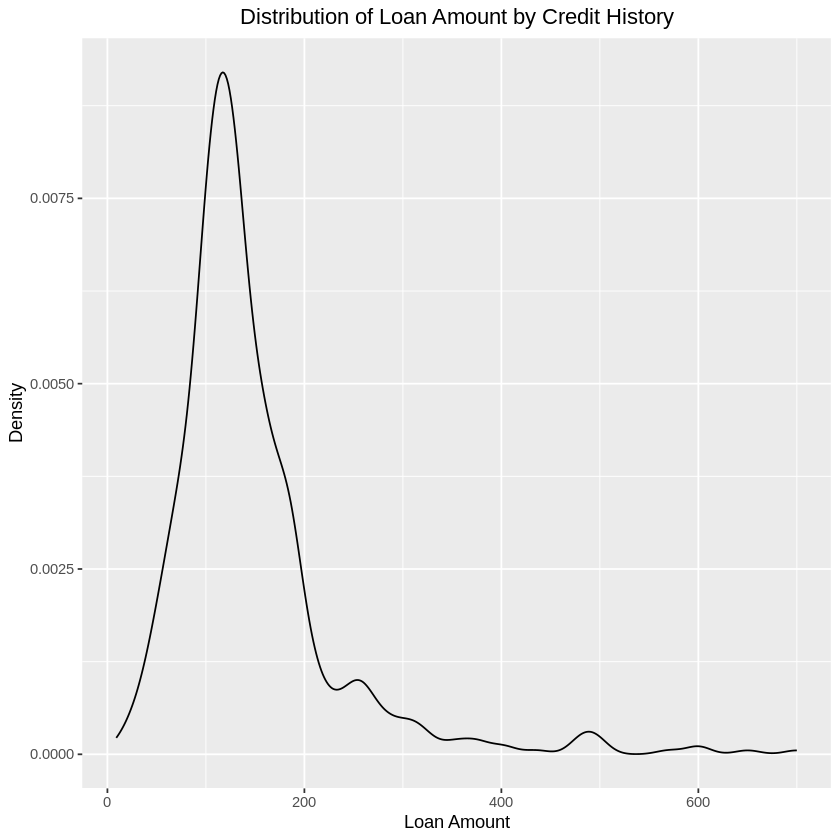

In [40]:
# 12. Visualize distribution of Loan Amount by Credit History
ggplot(loan, aes(x = LoanAmount, fill = Credit_History)) +
  geom_density(alpha = 0.5) +
  ggtitle("Distribution of Loan Amount by Credit History") +
  xlab("Loan Amount") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))